# Generating Synthetic data for 100 trials

This file goes over the process of generating a synthetic trial, your job is to replicate this process 100 times and store the results in json format on a text file for later processing.  Read the comments to get an idea about the missing code.



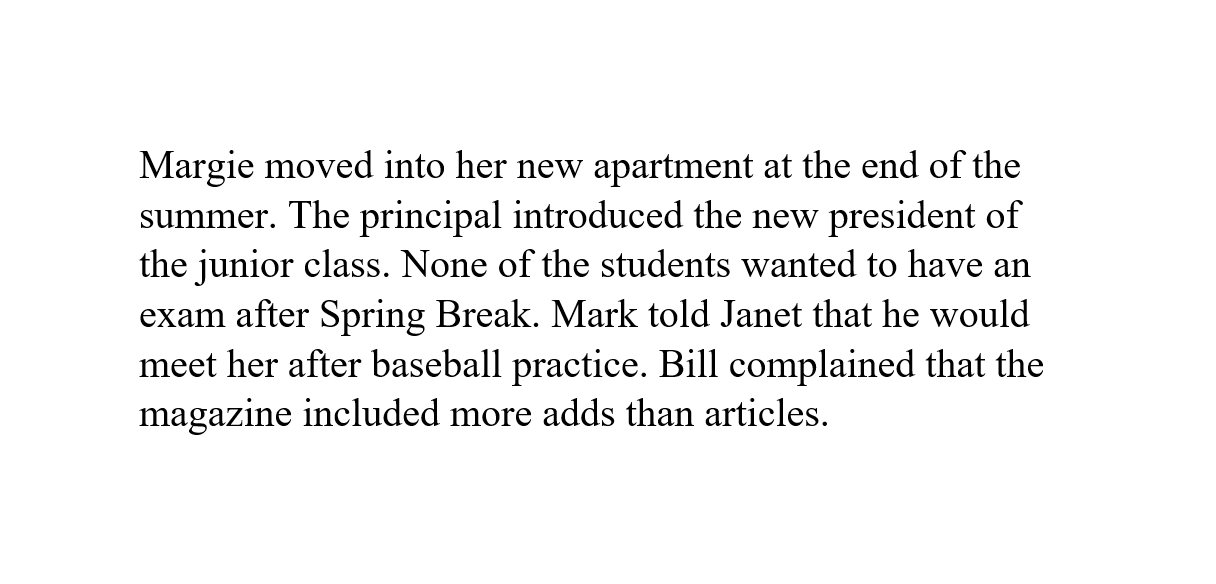

In [1]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='synthetic_text.png')
img

In [2]:
# yup, this is the same library we used last semester.  We call that foreshadowing :)

import emip_toolkit as EMTK

In [3]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

/Users/tamsinrogers/Desktop/CS421/project 1/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/tamsinrogers/Desktop/CS421/project 1/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/tamsinrogers/Desktop/CS421/project 1/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/tamsinrogers/Desktop/CS421/project 1/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.app

kind           name      x    y width height               image
0  sub-line  line 1 part 1  137.5  147   119     44  synthetic_text.png
1  sub-line  line 1 part 2  262.5  147   114     44  synthetic_text.png
2  sub-line  line 1 part 3  382.5  147    65     44  synthetic_text.png
3  sub-line  line 1 part 4  453.5  147    57     44  synthetic_text.png
4  sub-line  line 1 part 5  514.5  147    72     44  synthetic_text.png

In [4]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

/Users/tamsinrogers/Desktop/CS421/project 1/CS421-project1/emip_toolkit.py:1367: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location in aois_raw["name"].iteritems():


kind           name      x    y width height               image  \
0  sub-line  line 1 part 1  137.5  147   119     44  synthetic_text.png   
1  sub-line  line 1 part 2  262.5  147   114     44  synthetic_text.png   
2  sub-line  line 1 part 3  382.5  147    65     44  synthetic_text.png   
3  sub-line  line 1 part 4  453.5  147    57     44  synthetic_text.png   
4  sub-line  line 1 part 5  514.5  147    72     44  synthetic_text.png   

    token  
0  Margie  
1   moved  
2    into  
3     her  
4     new

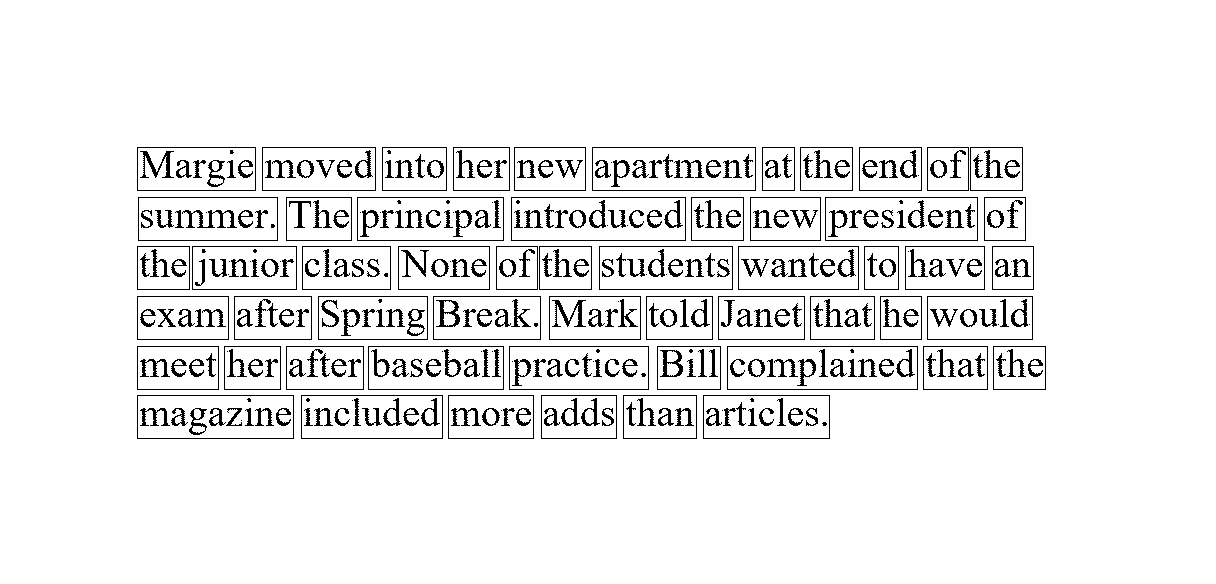

In [5]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

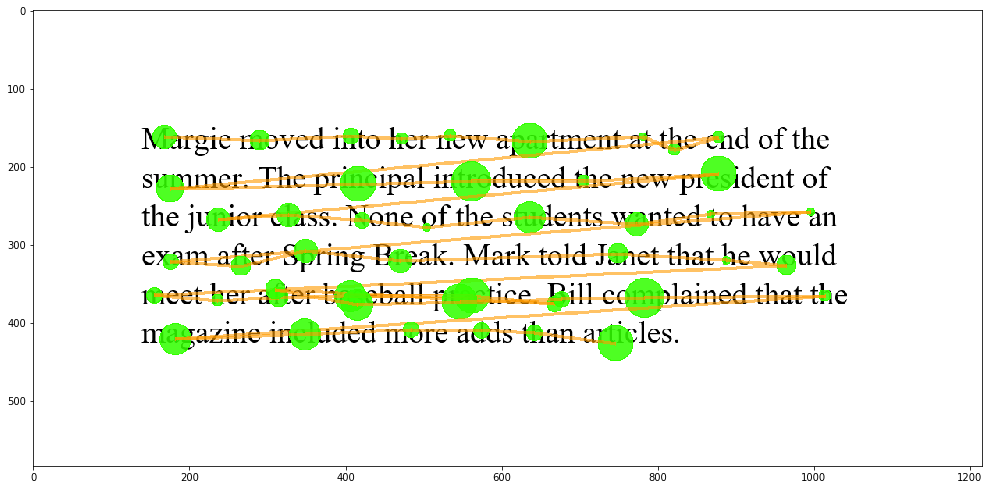

In [6]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)

# drawing the synthetic data!
correction.draw_fixation('synthetic_text.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

Look at that, we did something cool!  Now that we know how to generate a single snythetic trial, let's generate 100 and store them in a text file called "synthetic_dataset_with_time.txt" in json format.  I will guide you through the steps using the comments!

In [45]:
import correction

data = {}

# loop 100 times maintaining a variable called index
for index in range(100):

    # generate a synthetic trial using similar code to the one above
    synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)   

    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    data["robot" + str(index)] = synth_fixations

In [46]:
# check that the data looks correct

data["robot1"]

[[180.16666666666666, 168.0, 300],
 [310.5, 166.0, 250],
 [478.5, 163.0, 150],
 [529.5, 168.0, 150],
 [643.1666666666666, 165.0, 450],
 [779.5, 172.0, 100],
 [933.5, 176.0, 100],
 [997.1666666666666, 170.0, 150],
 [184.16666666666666, 219.0, 350],
 [316.5, 218.0, 150],
 [409.5, 222.0, 450],
 [569.8333333333334, 212.0, 500],
 [711.1666666666666, 214.0, 150],
 [886.5, 228.0, 450],
 [992.5, 226.0, 100],
 [145.16666666666666, 265.0, 150],
 [217.5, 275.0, 300],
 [331.1666666666667, 269.0, 300],
 [438.1666666666667, 261.0, 200],
 [519.5, 265.0, 100],
 [647.1666666666666, 270.0, 400],
 [770.8333333333334, 272.0, 300],
 [938.1666666666666, 263.0, 200],
 [171.16666666666666, 308.0, 200],
 [269.5, 309.0, 250],
 [355.1666666666667, 318.0, 300],
 [474.5, 325.0, 300],
 [668.8333333333334, 316.0, 200],
 [740.5, 318.0, 250],
 [827.1666666666666, 323.0, 200],
 [365.1666666666667, 319.0, 300],
 [463.5, 309.0, 300],
 [580.1666666666666, 308.0, 200],
 [748.5, 320.0, 250],
 [663.8333333333334, 317.0, 200]

In [55]:
import json
import pandas as pd

# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"

with open("synthetic_dataset_with_time.txt", "w") as outfile:
    json.dump(data, outfile)


That should be it, don't overthink it!  You did great by the way, I can see you, its one of my supernatural abilities.